<a href="https://colab.research.google.com/github/WittmannF/deepfeatx/blob/master/examples/Dog_breed_classification_with_DeepFeatX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepfeatx

In [ ]:
from deepfeatx.image import ImageFeatureExtractor, download_dataset

In [ ]:
download_dataset('https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2-320.tgz', 'imagewoof2-320.tgz')

Unzipping Dataset
Removing .zip file


In [ ]:
fe = ImageFeatureExtractor()

94773248/94765736 [==============================] - 3s 0us/step


In [ ]:
train=fe.extract_features_from_directory('/content/imagewoof2-320/train', 
                                   include_classes=True)

Found 9025 images belonging to 10 classes.
283/283 [==============================] - 98s 235ms/step


In [ ]:
test=fe.extract_features_from_directory('/content/imagewoof2-320/val', 
                                   include_classes=True)

Found 3929 images belonging to 10 classes.
123/123 [==============================] - 30s 246ms/step


In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,filepaths,classes
0,0.237844,0.054450,0.639398,0.608618,0.116549,0.000000,0.264913,0.527814,0.553124,0.062422,0.597322,0.551995,1.538062,0.087229,0.069903,1.049717,0.000000,0.000000,0.312020,0.000000,0.096075,0.000000,0.106390,0.166414,0.115637,0.416666,0.276402,0.525720,0.022977,0.026009,0.373635,3.121352,0.000000,0.015317,0.195799,0.199854,0.000000,0.078721,0.265925,1.011775,...,0.006679,0.073261,1.249752,0.009313,0.519781,0.475809,0.118590,0.075504,0.065688,0.062870,0.376480,0.223954,0.458716,0.267855,0.061920,0.095908,0.101483,0.806828,0.107143,0.574432,0.245828,0.810530,0.000000,0.415155,5.213059,0.231660,1.928583,0.011685,0.686305,0.953845,0.060105,0.043869,0.314362,0.145456,0.588392,2.882940,1.296056,0.023958,/content/imagewoof2-320/train/n02086240/ILSVRC...,0
1,0.098520,0.446052,0.104642,0.572953,0.010212,0.000000,0.000000,0.032278,0.364385,0.022812,0.851166,0.215408,0.369765,0.032217,0.102466,0.232351,0.200083,0.170829,0.236796,0.257147,1.002333,0.336416,0.043348,0.706188,0.201476,0.952863,0.156129,0.123324,0.000000,0.223463,0.283751,0.952406,0.004923,0.069859,0.626158,0.471082,0.020239,0.512703,1.054998,1.097418,...,0.008910,0.024075,2.383111,0.000000,0.046068,0.349720,0.054029,0.048795,0.036727,0.000000,0.057985,0.179271,0.086077,0.278433,0.148275,0.396516,0.150999,3.072363,0.136671,0.040338,0.197971,2.161973,0.687706,1.443419,1.804904,0.066075,0.000000,0.152276,0.317681,0.332944,0.112509,0.000000,0.491454,0.176205,0.505273,0.307416,0.084352,0.317227,/content/imagewoof2-320/train/n02086240/ILSVRC...,0
2,0.042899,0.462629,0.307304,0.168506,0.162290,0.016635,0.086793,0.595419,0.227667,0.411555,0.415608,0.084813,2.203585,0.439543,0.000000,0.147977,0.154587,0.033312,0.253764,0.174550,0.422745,0.959233,0.049450,0.301479,0.530903,0.152112,0.489868,2.518493,0.093235,0.488826,2.110896,0.979839,0.000000,0.426525,0.059574,0.539609,1.030921,0.126680,0.085949,0.636972,...,0.065650,0.098754,1.101451,0.000000,0.368398,0.424987,0.266959,0.219648,0.000000,0.029017,0.075970,0.316572,1.495570,1.294259,0.093777,0.105542,0.202619,0.567005,0.440339,0.703570,0.000000,1.422829,0.137513,0.625613,0.755016,0.652725,0.373952,0.197014,0.330074,1.604431,0.000000,0.194530,0.830746,0.484786,0.109601,0.332195,1.053379,0.656767,/content/imagewoof2-320/train/n02086240/ILSVRC...,0
3,0.995889,1.223786,0.000000,0.225155,0.155999,0.000000,0.088662,0.512845,0.747479,1.910068,1.523297,0.259706,0.302775,1.777451,0.108519,0.720490,0.023328,0.146354,0.030965,0.612603,0.586518,0.051504,0.000000,1.680935,0.373287,0.376471,0.031024,0.286189,0.183714,0.543619,0.317284,1.391957,0.087894,0.291455,0.045669,0.368554,0.000000,3.115640,0.000000,1.620189,...,0.138231,0.664711,2.249066,0.000000,0.819374,3.061121,0.594292,0.306802,0.395685,0.046212,0.453130,0.300492,0.005648,0.128572,0.557722,0.700669,0.301624,0.323963,0.217510,0.084181,1.783368,0.122128,0.191051,0.015810,0.339179,0.037708,0.035553,0.219688,0.077680,0.098829,0.670178,0.107995,0.357463,0.069244,0.635833,0.319764,0.083779,0.006741,/content/imagewoof2-320/train/n02086240/ILSVRC...,0
4,0.148129,0.343829,0.031656,1.713621,0.411021,0.583668,0.823800,0.620120,0.399715,2.831086,1.567333,1.712842,1.794272,0.104328,0.185081,1.817554,0.175428,1.377390,0.016864,0.241859,0.481733,1.107600,0.118504,0.606751,1.209958,0.221548,0.004560,0.760125,0.107104,0.000000,0.990001,1.076871,0.112426,1.395809,0.574226,0.061288,1.364177,0.310681,0.274481,1.073337,...,0.582449,0.000000,1.516474,0.000000,0.148482,0.432429,0.555154,0.154243,0.753457,0.173385,0.024658,0.199363,1.912384,1.102003,0.610880,0.355155,0.635568,1.659737,1.389745,0.060007,3.911130,0.451656,0.964653,0.210283,3.672244,0.387195,0.267077,0.055421,2.126716,1.002211,0

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, y_train = train.drop(['filepaths', 'classes'], axis=1), train['classes']
X_test, y_test = test.drop(['filepaths', 'classes'], axis=1), test['classes']

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
lr.score(X_test, y_test)

0.9409518961567829

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr')

0.9971828642533163

In [ ]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       409
           1       0.95      0.96      0.95       408
           2       0.91      0.92      0.91       418
           3       0.87      0.83      0.85       224
           4       0.94      0.95      0.95       401
           5       0.96      0.92      0.94       407
           6       0.92      0.95      0.94       401
           7       0.97      0.97      0.97       422
           8       0.98      0.98      0.98       429
           9       0.94      0.94      0.94       410

    accuracy                           0.94      3929
   macro avg       0.94      0.94      0.94      3929
weighted avg       0.94      0.94      0.94      3929



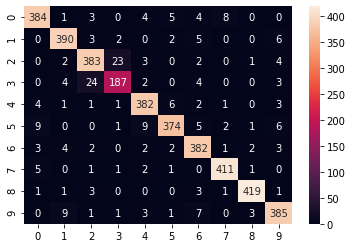

In [ ]:
import seaborn as sns
cm=confusion_matrix(y_test, lr.predict(X_test))
sns.heatmap(cm, annot=True, fmt='g')